In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


In [4]:
df = pd.read_csv("aa_dataset-tickets-multi-lang-5-2-50-version.csv")

In [5]:
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28586,Inquiry About Project Management Features,Looking for detailed information on the projec...,"Dear [Name], thank you for your email regardin...",Request,Technical Support,low,en,400,Feature,Documentation,Feedback,IT,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8'],
      dtype='object')

### Size of the dataset

In [8]:
df.shape

(28587, 16)

In [9]:
df['language'].unique()

array(['de', 'en'], dtype=object)

### Dropping rows which have german language

In [10]:
df = df[df['language'] != 'de']

### Size of the dataset after dropping german

In [11]:
df.shape

(16338, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16338 entries, 1 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   13731 non-null  object
 1   body      16338 non-null  object
 2   answer    16335 non-null  object
 3   type      16338 non-null  object
 4   queue     16338 non-null  object
 5   priority  16338 non-null  object
 6   language  16338 non-null  object
 7   version   16338 non-null  int64 
 8   tag_1     16338 non-null  object
 9   tag_2     16332 non-null  object
 10  tag_3     16269 non-null  object
 11  tag_4     14627 non-null  object
 12  tag_5     8416 non-null   object
 13  tag_6     3370 non-null   object
 14  tag_7     1134 non-null   object
 15  tag_8     281 non-null    object
dtypes: int64(1), object(15)
memory usage: 2.1+ MB


### Check for Unique and Duplicated Values

In [13]:
df.nunique()

subject     13731
body        16338
answer      16335
type            4
queue          10
priority        3
language        1
version         3
tag_1          81
tag_2         197
tag_3         303
tag_4         390
tag_5         441
tag_6         399
tag_7         282
tag_8         135
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

### Missing values

In [15]:
df.isnull().sum().sort_values(ascending=0)

tag_8       16057
tag_7       15204
tag_6       12968
tag_5        7922
subject      2607
tag_4        1711
tag_3          69
tag_2           6
answer          3
language        0
version         0
queue           0
type            0
body            0
priority        0
tag_1           0
dtype: int64

### Percentage of missing values

In [16]:
round((df.isnull().sum().sort_values(ascending=0) / (len(df))) * 100, 2)

tag_8       98.28
tag_7       93.06
tag_6       79.37
tag_5       48.49
subject     15.96
tag_4       10.47
tag_3        0.42
tag_2        0.04
answer       0.02
language     0.00
version      0.00
queue        0.00
type         0.00
body         0.00
priority     0.00
tag_1        0.00
dtype: float64

## Data Reduction

In [17]:
# df = df.drop(['subject' , 'language', 'body', 'answer'], axis=1)

In [18]:
df['queue'].unique()

array(['Technical Support', 'Returns and Exchanges',
       'Billing and Payments', 'Sales and Pre-Sales',
       'Service Outages and Maintenance', 'Product Support', 'IT Support',
       'Customer Service', 'Human Resources', 'General Inquiry'],
      dtype=object)

In [19]:
df


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,We apologize for the billing discrepancy in th...,Incident,Billing and Payments,high,en,400,Billing,Payment,Performance,Bug,NaN,NaN,NaN,NaN
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...","Dear [Name], we acknowledge the urgency of the...",Problem,Product Support,medium,en,400,Security,Incident,Bug,Performance,NaN,NaN,NaN,NaN
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16338 entries, 1 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   13731 non-null  object
 1   body      16338 non-null  object
 2   answer    16335 non-null  object
 3   type      16338 non-null  object
 4   queue     16338 non-null  object
 5   priority  16338 non-null  object
 6   language  16338 non-null  object
 7   version   16338 non-null  int64 
 8   tag_1     16338 non-null  object
 9   tag_2     16332 non-null  object
 10  tag_3     16269 non-null  object
 11  tag_4     14627 non-null  object
 12  tag_5     8416 non-null   object
 13  tag_6     3370 non-null   object
 14  tag_7     1134 non-null   object
 15  tag_8     281 non-null    object
dtypes: int64(1), object(15)
memory usage: 2.1+ MB


In [21]:
df.isnull().sum()

subject      2607
body            0
answer          3
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2           6
tag_3          69
tag_4        1711
tag_5        7922
tag_6       12968
tag_7       15204
tag_8       16057
dtype: int64

In [22]:
round(df.describe(include='all'),2)

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,13731,16338,16335,16338,16338,16338,16338,16338.00,16338,16332,16269,14627,8416,3370,1134,281
unique,13731,16338,16335,4,10,3,1,NaN,81,197,303,390,441,399,282,135
top,Inquiry About Project Management Features,Looking for detailed information on the projec...,"Dear [Name], thank you for your email regardin...",Incident,Technical Support,medium,en,NaN,Security,Performance,IT,Tech Support,Tech Support,Tech Support,Tech Support,Tech Support
freq,1,1,1,6571,4737,6618,16338,NaN,3333,3357,3507,3815,2682,1102,239,53
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


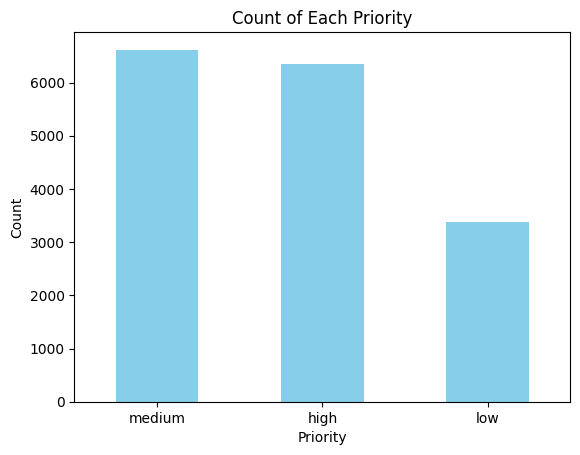

In [23]:
df['priority'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Each Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



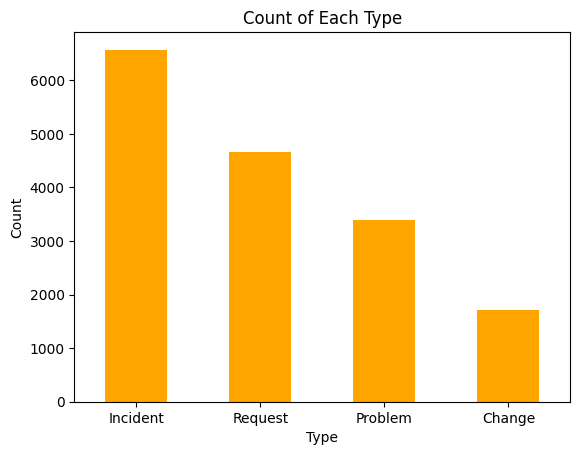

In [24]:
df['type'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


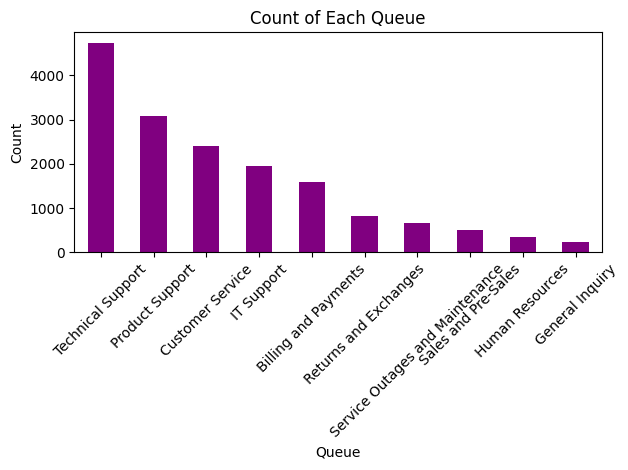

In [25]:
df['queue'].value_counts().plot(kind='bar', color='purple')
plt.title('Count of Each Queue')
plt.xlabel('Queue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


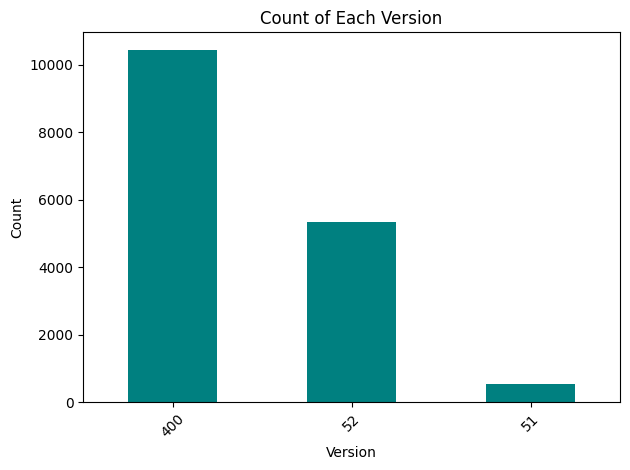

In [26]:
df['version'].value_counts().plot(kind='bar', color='teal')
plt.title('Count of Each Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df.rename(columns={'queue': 'Sub-Category'}, inplace=True)

def assign_category(sub_category):
    if sub_category in ['Technical Support', 'Product Support', 'Returns and Exchanges',
                        'Billing and Payments', 'Sales and Pre-Sales', 'General Inquiry']:
        return 'Customer Support'
    elif sub_category in ['IT Support', 'Service Outages and Maintenance']:
        return 'IT & Infrastructure'
    elif sub_category in ['Human Resources', 'Customer Service']:
        return 'Internal Operations'
    else:
        return 'Unknown'  

df['Category'] = df['Sub-Category'].apply(assign_category)

# df[['Category', 'Sub-Category']].drop_duplicates()

df[['Category', 'Sub-Category']].drop_duplicates().sort_values(['Category', 'Sub-Category'])


,Category,Sub-Category
3,Customer Support,Billing and Payments
37,Customer Support,General Inquiry
10,Customer Support,Product Support
2,Customer Support,Returns and Exchanges
4,Customer Support,Sales and Pre-Sales
1,Customer Support,Technical Support
12,IT & Infrastructure,IT Support
6,IT & Infrastructure,Service Outages and Maintenance
15,Internal Operations,Customer Service
21,Internal Operations,Human Resources


In [28]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'Sub-Category', 'priority',
       'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5',
       'tag_6', 'tag_7', 'tag_8', 'Category'],
      dtype='object')

In [29]:
df = df.drop(['answer' , 'type', 'priority', 'language','version', 'tag_1', 'tag_2','tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8' ], axis=1)

In [30]:
df

,subject,body,Sub-Category,Category
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",Technical Support,Customer Support
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Returns and Exchanges,Customer Support
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",Billing and Payments,Customer Support
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Sales and Pre-Sales,Customer Support
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Technical Support,Customer Support
...,...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,Billing and Payments,Customer Support
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...",Product Support,Customer Support
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,Technical Support,Customer Support
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,IT Support,IT & Infrastructure


## First approach


### Two separate models:
### Model 1: reads the email and guesses Category
### Model 2: reads the same email and guesses Sub Category
### But: Model 2 doesn’t know what Model 1 guessed

In [31]:
# import re
# import nltk
# import pandas as pd
# from nltk.corpus import stopwords, wordnet
# from nltk.stem import WordNetLemmatizer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# # === NLTK downloads ===
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# # === Initialize tools ===
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# # === Text cleaning and lemmatization ===
# def clean_and_lemmatize(text):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers
#     words = text.split()
#     words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
#     return ' '.join(words)

# # === Step 1: Combine and clean 'subject' and 'body' ===
# df['text'] = (df['subject'].fillna('') + ' ' + df['body'].fillna('')).apply(clean_and_lemmatize)

# # === Step 2: Encode target labels ===
# le_category = LabelEncoder()
# le_subcategory = LabelEncoder()
# df['Category_encoded'] = le_category.fit_transform(df['Category'])
# df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# # === Step 3: Train/test split ===
# X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
#     df['text'], df['Category_encoded'], df['Sub_Category_encoded'], test_size=0.2, random_state=42
# )

# # === Step 4: TF-IDF with unigrams + bigrams ===
# vectorizer = TfidfVectorizer(
#     stop_words='english',
#     max_features=5000,
#     ngram_range=(1, 2)
# )
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # === Step 5: Train Random Forest models with class weights ===
# rf_category = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_category.fit(X_train_tfidf, y_cat_train)

# rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_subcategory.fit(X_train_tfidf, y_sub_train)

# # === Step 6: Evaluate Random Forest models ===
# cat_preds_rf = rf_category.predict(X_test_tfidf)
# sub_preds_rf = rf_subcategory.predict(X_test_tfidf)

# print("=== Classification Report for Category (Random Forest) ===")
# print(classification_report(y_cat_test, cat_preds_rf, target_names=le_category.classes_))

# print("\n=== Classification Report for Sub-Category (Random Forest) ===")
# print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))

# # === Step 7: Train Logistic Regression models with class weights ===
# lr_category = LogisticRegression(max_iter=1000, class_weight='balanced')
# lr_category.fit(X_train_tfidf, y_cat_train)

# lr_subcategory = LogisticRegression(max_iter=1000, class_weight='balanced')
# lr_subcategory.fit(X_train_tfidf, y_sub_train)

# # === Step 8: Evaluate Logistic Regression models ===
# cat_preds_lr = lr_category.predict(X_test_tfidf)
# sub_preds_lr = lr_subcategory.predict(X_test_tfidf)

# print("\n=== Classification Report for Category (Logistic Regression) ===")
# print(classification_report(y_cat_test, cat_preds_lr, target_names=le_category.classes_))

# print("\n=== Classification Report for Sub-Category (Logistic Regression) ===")
# print(classification_report(y_sub_test, sub_preds_lr, target_names=le_subcategory.classes_))


In [ ]:

# === Step 1: Combine and clean 'subject' and 'body' ===
df['text'] = (df['subject'].fillna('') + ' ' + df['body'].fillna(''))

# === Step 1: Label Encoding ===
le_category = LabelEncoder()
le_subcategory = LabelEncoder()

df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# === Step 2: Create Combined Label for Stratified Split ===
df['combined_label'] = df['Category_encoded'].astype(str) + '_' + df['Sub_Category_encoded'].astype(str)

# === Step 3: Train/Test Split with Stratification on Combined Label ===
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df[['Category_encoded', 'Sub_Category_encoded']],
    test_size=0.2,
    random_state=42,
    stratify=df['combined_label']
)

# === Step 4: Extract Individual Target Columns ===
y_cat_train = y_train['Category_encoded']
y_cat_test = y_test['Category_encoded']
y_sub_train = y_train['Sub_Category_encoded']
y_sub_test = y_test['Sub_Category_encoded']

# === Step 5: Cleanup (Optional) ===
df.drop(columns=['combined_label'], inplace=True)

# === Step 4: TF-IDF with unigrams + bigrams ===
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)  # Use unigrams and bigrams
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === Step 5: Train Random Forest models ===
rf_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_category.fit(X_train_tfidf, y_cat_train)

rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42)
rf_subcategory.fit(X_train_tfidf, y_sub_train)

# === Step 6: Evaluate Random Forest models ===
cat_preds_rf = rf_category.predict(X_test_tfidf)
sub_preds_rf = rf_subcategory.predict(X_test_tfidf)

print("=== Classification Report for Category (Random Forest) ===")
print(classification_report(y_cat_test, cat_preds_rf, target_names=le_category.classes_))

print("\n=== Classification Report for Sub-Category (Random Forest) ===")
print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))


=== Classification Report for Category (Random Forest) ===
                     precision    recall  f1-score   support

   Customer Support       0.76      0.99      0.86      2195
IT & Infrastructure       0.91      0.41      0.57       521
Internal Operations       0.94      0.32      0.47       552

           accuracy                           0.78      3268
          macro avg       0.87      0.57      0.63      3268
       weighted avg       0.82      0.78      0.75      3268


=== Classification Report for Sub-Category (Random Forest) ===
                                 precision    recall  f1-score   support

           Billing and Payments       0.94      0.80      0.87       319
               Customer Service       0.61      0.61      0.61       482
                General Inquiry       1.00      0.43      0.60        47
                Human Resources       0.96      0.34      0.51        70
                     IT Support       0.88      0.47      0.62       388
        

### Splitting the data into training and test sets, there's a possibility that the classes (Sub-Categories) may not be equally represented. This imbalance can lead to certain classes being underrepresented in the training data, which may be contributing to the low model performance

In [43]:
# === Step 1: Combine and clean 'subject' and 'body' ===
df['text'] = (df['subject'].fillna('') + ' ' + df['body'].fillna(''))

# === Step 2: Encode target labels ===
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# === Step 3: Train/test split ===
X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
    df['text'], df['Category_encoded'], df['Sub_Category_encoded'], test_size=0.2, random_state=42
)

# === Step 4: TF-IDF with unigrams + bigrams ===
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)  # Use unigrams and bigrams
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === Step 5: Train Random Forest models ===
rf_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_category.fit(X_train_tfidf, y_cat_train)

rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42)
rf_subcategory.fit(X_train_tfidf, y_sub_train)

# === Step 6: Evaluate Random Forest models ===
cat_preds_rf = rf_category.predict(X_test_tfidf)
sub_preds_rf = rf_subcategory.predict(X_test_tfidf)

print("=== Classification Report for Category (Random Forest) ===")
print(classification_report(y_cat_test, cat_preds_rf, target_names=le_category.classes_))

print("\n=== Classification Report for Sub-Category (Random Forest) ===")
print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))


=== Classification Report for Category (Random Forest) ===
                     precision    recall  f1-score   support

   Customer Support       0.76      0.99      0.86      2181
IT & Infrastructure       0.96      0.41      0.58       523
Internal Operations       0.95      0.29      0.45       564

           accuracy                           0.78      3268
          macro avg       0.89      0.57      0.63      3268
       weighted avg       0.82      0.78      0.74      3268


=== Classification Report for Sub-Category (Random Forest) ===
                                 precision    recall  f1-score   support

           Billing and Payments       0.94      0.78      0.86       301
               Customer Service       0.60      0.59      0.60       496
                General Inquiry       0.95      0.51      0.67        37
                Human Resources       1.00      0.35      0.52        68
                     IT Support       0.89      0.45      0.60       362
        

In [ ]:
# # Download NLTK resources
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# # Initialize tools
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# # Text cleaning and lemmatization function
# def clean_and_lemmatize(text):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s]', '', text)  # Remove non-letter characters
#     words = text.split()
#     words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
#     return ' '.join(words)

# # Step 1: Combine and clean 'subject' and 'body'
# df['text'] = (df['subject'].fillna('') + ' ' + df['body'].fillna('')).apply(clean_and_lemmatize)

# # Step 2: Encode the target labels
# le_category = LabelEncoder()
# le_subcategory = LabelEncoder()
# df['Category_encoded'] = le_category.fit_transform(df['Category'])
# df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# # Step 3: Train/test split
# X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
#     df['text'], df['Category_encoded'], df['Sub_Category_encoded'], test_size=0.2, random_state=42
# )

# # Step 4: TF-IDF vectorization
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Step 5: Train Random Forest models
# rf_category = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_category.fit(X_train_tfidf, y_cat_train)

# rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_subcategory.fit(X_train_tfidf, y_sub_train)

# # Step 6: Evaluate Random Forest models
# cat_preds_rf = rf_category.predict(X_test_tfidf)
# sub_preds_rf = rf_subcategory.predict(X_test_tfidf)

# print("=== Classification Report for Category (Random Forest) ===")
# print(classification_report(y_cat_test, cat_preds_rf, target_names=le_category.classes_))

# print("\n=== Classification Report for Sub-Category (Random Forest) ===")
# print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))

# # Step 7: Train Logistic Regression models
# lr_category = LogisticRegression(max_iter=1000)
# lr_category.fit(X_train_tfidf, y_cat_train)

# lr_subcategory = LogisticRegression(max_iter=1000)
# lr_subcategory.fit(X_train_tfidf, y_sub_train)

# # Step 8: Evaluate Logistic Regression models
# cat_preds_lr = lr_category.predict(X_test_tfidf)
# sub_preds_lr = lr_subcategory.predict(X_test_tfidf)

# print("\n=== Classification Report for Category (Logistic Regression) ===")
# print(classification_report(y_cat_test, cat_preds_lr, target_names=le_category.classes_))

# print("\n=== Classification Report for Sub-Category (Logistic Regression) ===")
# print(classification_report(y_sub_test, sub_preds_lr, target_names=le_subcategory.classes_))


### Hyperparameter tunning

In [ ]:
# Assume df is already loaded with 'subject', 'body', 'Category', 'Sub-Category'

df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
    df['text'], df['Category_encoded'], df['Sub_Category_encoded'],
    test_size=0.2, random_state=42
)

def load_glove_embeddings(file_path, embedding_dim=100):
    embeddings_index = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = 'glove.6B.100d.txt'
embedding_dim = 100
embeddings_index = load_glove_embeddings(glove_path, embedding_dim)

def text_to_glove_vector(text, embeddings_index, embedding_dim=100):
    words = text.lower().split()
    valid_vectors = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

X_train_glove = np.vstack([text_to_glove_vector(t, embeddings_index, embedding_dim) for t in X_train])
X_test_glove = np.vstack([text_to_glove_vector(t, embeddings_index, embedding_dim) for t in X_test])

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

# Tune Logistic Regression for Category
grid_search_cat = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_cat.fit(X_train_glove, y_cat_train)
print("Best parameters for Category:", grid_search_cat.best_params_)
best_lr_cat = grid_search_cat.best_estimator_
cat_preds = best_lr_cat.predict(X_test_glove)
print("\nClassification Report - Category (Tuned LR):")
print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

# Tune Logistic Regression for Sub-Category
grid_search_sub = from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_sub.fit(X_train_glove, y_sub_train)
print("Best parameters for Sub-Category:", grid_search_sub.best_params_)
best_lr_sub = grid_search_sub.best_estimator_
sub_preds = best_lr_sub.predict(X_test_glove)
print("\nClassification Report - Sub-Category (Tuned LR):")
print(classification_report(y_sub_test, sub_preds, target_names=le_subcategory.classes_))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Category: {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}

Classification Report - Category (Tuned LR):
                     precision    recall  f1-score   support

   Customer Support       0.68      0.99      0.80      2181
IT & Infrastructure       0.73      0.09      0.16       523
Internal Operations       0.20      0.00      0.01       564

           accuracy                           0.68      3268
          macro avg       0.53      0.36      0.32      3268
       weighted avg       0.60      0.68      0.56      3268

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Sub-Category: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}

Classification Report - Sub-Category (Tuned LR):
                                 precision    recall  f1-score   support

           Billing and Payments       0.64      0.66      0.65       301
               Customer Service       0.25      0.

c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Using Pretrained Word Embeddings

In [ ]:

# Step 1: Load your data (assume df is already loaded)
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Step 2: Encode labels
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# Step 3: Train/test split
X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
    df['text'],
    df['Category_encoded'],
    df['Sub_Category_encoded'],
    test_size=0.2,
    random_state=42
)

# Step 4: Load GloVe embeddings
def load_glove_embeddings(file_path, embedding_dim=100):
    embeddings_index = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = 'glove.6B.100d.txt'
embedding_dim = 100
embeddings_index = load_glove_embeddings(glove_path, embedding_dim)

# Step 5: Convert text to vectors (using simple split)
def text_to_glove_vector(text, embeddings_index, embedding_dim=100):
    words = text.lower().split()
    valid_vectors = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

X_train_glove = np.vstack([text_to_glove_vector(t, embeddings_index, embedding_dim) for t in X_train])
X_test_glove = np.vstack([text_to_glove_vector(t, embeddings_index, embedding_dim) for t in X_test])

# Step 6: Train and evaluate models

# Category: Random Forest
rf_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_category.fit(X_train_glove, y_cat_train)
cat_preds_rf = rf_category.predict(X_test_glove)

print("=== Classification Report for Category (Random Forest) ===")
print(classification_report(y_cat_test, cat_preds_rf, target_names=le_category.classes_))

# Sub-Category: Random Forest
rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42)
rf_subcategory.fit(X_train_glove, y_sub_train)
sub_preds_rf = rf_subcategory.predict(X_test_glove)

print("\n=== Classification Report for Sub-Category (Random Forest) ===")
print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))

# Category: Logistic Regression
lr_category = LogisticRegression(max_iter=1000)
lr_category.fit(X_train_glove, y_cat_train)
cat_preds_lr = lr_category.predict(X_test_glove)

print("\n=== Classification Report for Category (Logistic Regression) ===")
print(classification_report(y_cat_test, cat_preds_lr, target_names=le_category.classes_))

# Sub-Category: Logistic Regression
lr_subcategory = LogisticRegression(max_iter=1000)
lr_subcategory.fit(X_train_glove, y_sub_train)
sub_preds_lr = lr_subcategory.predict(X_test_glove)

print("\n=== Classification Report for Sub-Category (Logistic Regression) ===")
print(classification_report(y_sub_test, sub_preds_lr, target_names=le_subcategory.classes_))


=== Classification Report for Category (Random Forest) ===
                     precision    recall  f1-score   support

   Customer Support       0.69      1.00      0.81      2181
IT & Infrastructure       0.93      0.13      0.23       523
Internal Operations       0.75      0.03      0.06       564

           accuracy                           0.69      3268
          macro avg       0.79      0.39      0.37      3268
       weighted avg       0.74      0.69      0.59      3268


=== Classification Report for Sub-Category (Random Forest) ===
                                 precision    recall  f1-score   support

           Billing and Payments       0.82      0.67      0.74       301
               Customer Service       0.42      0.40      0.41       496
                General Inquiry       1.00      0.19      0.32        37
                Human Resources       1.00      0.10      0.19        68
                     IT Support       0.76      0.22      0.35       362
        

c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BonySebastian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Model Ensembles

In [ ]:
# Step 1: Combine 'Subject' and 'Body' into a single text field
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Step 2: Encode the target labels
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# Step 3: Train/test split
X_train, X_test, y_cat_train, y_cat_test, y_sub_train, y_sub_test = train_test_split(
    df['text'],
    df['Category_encoded'],
    df['Sub_Category_encoded'],
    test_size=0.2,
    random_state=42
)

# Step 4: TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train Random Forest and Logistic Regression (individually and for ensemble)
rf_category = RandomForestClassifier(n_estimators=100, random_state=42)
lr_category = LogisticRegression(max_iter=1000)

# Train ensemble using VotingClassifier
voting_ensemble = VotingClassifier(
    estimators=[('lr', lr_category), ('rf', rf_category)],
    voting='soft'  # use probabilities to vote (more accurate)
)

voting_ensemble.fit(X_train_tfidf, y_cat_train)

# Step 6: Evaluate Ensemble model
cat_preds_ensemble = voting_ensemble.predict(X_test_tfidf)

print("\n=== Classification Report for Category (Voting Ensemble) ===")
print(classification_report(y_cat_test, cat_preds_ensemble, target_names=le_category.classes_))

# Step 7: Train Sub-Category Models
rf_subcategory = RandomForestClassifier(n_estimators=100, random_state=42)
lr_subcategory = LogisticRegression(max_iter=1000)

rf_subcategory.fit(X_train_tfidf, y_sub_train)
lr_subcategory.fit(X_train_tfidf, y_sub_train)

# Step 8: Evaluate Sub-Category Models
sub_preds_rf = rf_subcategory.predict(X_test_tfidf)
sub_preds_lr = lr_subcategory.predict(X_test_tfidf)

print("\n=== Classification Report for Sub-Category (Random Forest) ===")
print(classification_report(y_sub_test, sub_preds_rf, target_names=le_subcategory.classes_))

print("\n=== Classification Report for Sub-Category (Logistic Regression) ===")
print(classification_report(y_sub_test, sub_preds_lr, target_names=le_subcategory.classes_))



=== Classification Report for Category (Voting Ensemble) ===
                     precision    recall  f1-score   support

   Customer Support       0.72      0.99      0.84      2181
IT & Infrastructure       0.91      0.33      0.48       523
Internal Operations       0.80      0.15      0.25       564

           accuracy                           0.74      3268
          macro avg       0.81      0.49      0.52      3268
       weighted avg       0.77      0.74      0.68      3268


=== Classification Report for Sub-Category (Random Forest) ===
                                 precision    recall  f1-score   support

           Billing and Payments       0.91      0.81      0.86       301
               Customer Service       0.64      0.58      0.61       496
                General Inquiry       0.90      0.49      0.63        37
                Human Resources       0.97      0.43      0.59        68
                     IT Support       0.96      0.48      0.64       362
     

# Second Appraoch

###  Combine Category and Sub Category into one label and train one single model to predict that joint label.

### Random forest

In [38]:
# Step 0: Combine Subject and Body into one text field
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Step 1: Encode labels
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# Step 2: Create features and targets
X = df['text']
y_category = df['Category_encoded']
y_subcategory = df['Sub_Category_encoded']

# Step 3: Split with index tracking
X_train_text, X_test_text, y_cat_train, y_cat_test, y_sub_train, y_sub_test, train_idx, test_idx = train_test_split(
    X, y_category, y_subcategory, df.index,
    test_size=0.2, random_state=42
)

# Step 4: TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Step 5: Train Category model
cat_model = RandomForestClassifier(n_estimators=100, random_state=42)
cat_model.fit(X_train_tfidf, y_cat_train)

# Step 6: Train Sub-Category models per Category
df_train = df.loc[train_idx]
subcategory_models = {}

for category_label in df['Category_encoded'].unique():
    cat_indices = df_train['Category_encoded'] == category_label

    X_cat = vectorizer.transform(df_train.loc[cat_indices, 'text'])
    y_sub = df_train.loc[cat_indices, 'Sub_Category_encoded']

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_cat, y_sub)

    subcategory_models[category_label] = model

# Step 7: Predict Category
cat_preds = cat_model.predict(X_test_tfidf)

# Step 8: Predict Sub-Category based on predicted Category
sub_preds = []
for i in range(X_test_tfidf.shape[0]):
    cat_pred = cat_preds[i]
    sub_model = subcategory_models.get(cat_pred)

    x = X_test_tfidf[i]

    if sub_model:
        pred = sub_model.predict(x)
        sub_preds.append(pred[0])
    else:
        sub_preds.append(-1)  # fallback if no model available

# Step 9: Evaluate
print(" Classification Report for Category (Random Forest):")
print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

print("\n Classification Report for Sub-Category (Random Forest - Hierarchical):")
print(classification_report(y_sub_test, sub_preds, target_names=le_subcategory.classes_))


 Classification Report for Category (Random Forest):
                     precision    recall  f1-score   support

   Customer Support       0.75      0.99      0.86      2181
IT & Infrastructure       0.96      0.40      0.57       523
Internal Operations       0.94      0.29      0.45       564

           accuracy                           0.78      3268
          macro avg       0.89      0.56      0.62      3268
       weighted avg       0.82      0.78      0.74      3268


 Classification Report for Sub-Category (Random Forest - Hierarchical):
                                 precision    recall  f1-score   support

           Billing and Payments       0.83      0.82      0.83       301
               Customer Service       0.89      0.28      0.42       496
                General Inquiry       0.94      0.46      0.62        37
                Human Resources       1.00      0.31      0.47        68
                     IT Support       0.93      0.30      0.46       362
     

In [39]:
# Combine Subject and Body into one text field
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Encode labels
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# Prepare data
X = df['text']
y_cat = df['Category_encoded']
y_sub = df['Sub_Category_encoded']

X_train_text, X_test_text, y_cat_train, y_cat_test, y_sub_train, y_sub_test, train_idx, test_idx = train_test_split(
    X, y_cat, y_sub, df.index, test_size=0.2, random_state=42
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, iterations=300, random_seed=42)
}

# Results dictionary
results = {}

# Loop through models
for name, cat_model in models.items():
    print(f"\n========== {name} ==========")

    # Train category model
    cat_model.fit(X_train_tfidf, y_cat_train)
    cat_preds = cat_model.predict(X_test_tfidf)

    # Train subcategory models per category
    df_train = df.loc[train_idx]
    sub_models = {}
    for cat_label in df['Category_encoded'].unique():
        mask = df_train['Category_encoded'] == cat_label
        X_sub = vectorizer.transform(df_train.loc[mask, 'text'])
        y_sub = df_train.loc[mask, 'Sub_Category_encoded']

        sub_model = models[name].__class__()  # fresh instance
        if name == 'CatBoost':
            sub_model.set_params(verbose=0, iterations=300, random_seed=42)
        elif name == 'LogisticRegression':
            sub_model.set_params(max_iter=1000)
        else:
            sub_model.set_params(n_estimators=100, random_state=42)

        sub_model.fit(X_sub, y_sub)
        sub_models[cat_label] = sub_model

    # Predict subcategories
    sub_preds = []
    for i in range(X_test_tfidf.shape[0]):
        cat_pred = int(cat_preds[i])
        x = X_test_tfidf[i]
        sub_model = sub_models.get(cat_pred)

        if sub_model:
            sub_pred = sub_model.predict(x)
            sub_preds.append(int(sub_pred[0]))
        else:
            sub_preds.append(-1)

    # Store and print results
    print("\n Category Classification Report:")
    print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

    print("\n Sub-Category Classification Report:")
    print(classification_report(y_sub_test, sub_preds, target_names=le_subcategory.classes_))

    results[name] = {
        'cat_preds': cat_preds,
        'sub_preds': sub_preds
    }



========== LogisticRegression ==========

 Category Classification Report:
                     precision    recall  f1-score   support

   Customer Support       0.71      0.96      0.82      2181
IT & Infrastructure       0.76      0.29      0.42       523
Internal Operations       0.46      0.11      0.18       564

           accuracy                           0.70      3268
          macro avg       0.64      0.45      0.47      3268
       weighted avg       0.67      0.70      0.64      3268


 Sub-Category Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.75      0.70      0.72       301
               Customer Service       0.41      0.11      0.17       496
                General Inquiry       1.00      0.03      0.05        37
                Human Resources       1.00      0.12      0.21        68
                     IT Support       0.49      0.14      0.22       362
                P

C:\Users\BonySebastian\AppData\Local\Temp\ipykernel_12656\356932758.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cat_pred = int(cat_preds[i])
C:\Users\BonySebastian\AppData\Local\Temp\ipykernel_12656\356932758.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sub_preds.append(int(sub_pred[0]))



 Category Classification Report:
                     precision    recall  f1-score   support

   Customer Support       0.70      0.97      0.82      2181
IT & Infrastructure       0.75      0.23      0.35       523
Internal Operations       0.62      0.10      0.17       564

           accuracy                           0.70      3268
          macro avg       0.69      0.43      0.44      3268
       weighted avg       0.70      0.70      0.63      3268


 Sub-Category Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.71      0.71      0.71       301
               Customer Service       0.51      0.08      0.14       496
                General Inquiry       1.00      0.08      0.15        37
                Human Resources       0.89      0.12      0.21        68
                     IT Support       0.53      0.09      0.16       362
                Product Support       0.35      0.39      0

# Third approach

### Step 1: Predict Category.
### Step 2: Based on predicted Category, pass the text to a Category-specific Sub Category classifier.

In [40]:

# --- Step 1: Prepare Text Field ---
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# --- Step 2: Encode Labels ---
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# --- Step 3: Split Data ---
X = df['text']
y_cat = df['Category_encoded']
y_sub = df['Sub_Category_encoded']

X_train_text, X_test_text, y_cat_train, y_cat_test, y_sub_train, y_sub_test, train_idx, test_idx = train_test_split(
    X, y_cat, y_sub, df.index, test_size=0.2, random_state=42
)

# --- Step 4: TF-IDF Vectorizer ---
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Common function to train and evaluate a model
def train_and_evaluate_model(model_type='logistic'):
    print(f"\n========== {model_type.upper()} MODEL ==========")

    # --- Step 5: Train Category Model ---
    if model_type == 'logistic':
        cat_model = LogisticRegression(max_iter=1000)
    elif model_type == 'random_forest':
        cat_model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        raise ValueError("Model type must be 'logistic' or 'random_forest'.")

    cat_model.fit(X_train_tfidf, y_cat_train)
    cat_preds = cat_model.predict(X_test_tfidf)

    # --- Step 6: Train Category-Specific Sub-Category Models ---
    df_train = df.loc[train_idx]
    subcategory_models = {}

    for cat_label in df['Category_encoded'].unique():
        mask = df_train['Category_encoded'] == cat_label
        X_sub = vectorizer.transform(df_train.loc[mask, 'text'])
        y_sub_cat = df_train.loc[mask, 'Sub_Category_encoded']

        if len(set(y_sub_cat)) > 1:
            if model_type == 'logistic':
                sub_model = LogisticRegression(max_iter=1000)
            else:
                sub_model = RandomForestClassifier(n_estimators=100, random_state=42)

            sub_model.fit(X_sub, y_sub_cat)
            subcategory_models[cat_label] = sub_model

    # --- Step 7: Predict Sub-Category Based on Predicted Category ---
    sub_preds = []
    for i in range(X_test_tfidf.shape[0]):
        cat_pred = int(cat_preds[i])
        x = X_test_tfidf[i]

        sub_model = subcategory_models.get(cat_pred)
        if sub_model:
            sub_pred = sub_model.predict(x)
            sub_preds.append(int(sub_pred[0]))
        else:
            sub_preds.append(-1)  # Fallback if sub-model not found

    # --- Step 8: Evaluation ---
    print("\n● Category Classification Report:")
    print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

    print("\n● Sub-Category Classification Report:")
    filtered_y_sub_test = [y if p != -1 else -1 for y, p in zip(y_sub_test, sub_preds)]
    filtered_sub_preds = [p for p in sub_preds]
    print(classification_report(filtered_y_sub_test, filtered_sub_preds, target_names=le_subcategory.classes_, zero_division=0))


# --- Run Both Models ---
train_and_evaluate_model('logistic')
train_and_evaluate_model('random_forest')



========== LOGISTIC MODEL ==========

● Category Classification Report:
                     precision    recall  f1-score   support

   Customer Support       0.71      0.96      0.82      2181
IT & Infrastructure       0.76      0.29      0.42       523
Internal Operations       0.46      0.11      0.18       564

           accuracy                           0.70      3268
          macro avg       0.64      0.45      0.47      3268
       weighted avg       0.67      0.70      0.64      3268


● Sub-Category Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.75      0.70      0.72       301
               Customer Service       0.41      0.11      0.17       496
                General Inquiry       1.00      0.03      0.05        37
                Human Resources       1.00      0.12      0.21        68
                     IT Support       0.49      0.14      0.22       362
                Pro

### Random Forest

In [41]:
# --- Step 1: Prepare Text Field ---
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# --- Step 2: Encode Labels ---
le_category = LabelEncoder()
le_subcategory = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# --- Step 3: Split Data ---
X = df['text']
y_cat = df['Category_encoded']
y_sub = df['Sub_Category_encoded']

X_train_text, X_test_text, y_cat_train, y_cat_test, y_sub_train, y_sub_test, train_idx, test_idx = train_test_split(
    X, y_cat, y_sub, df.index, test_size=0.2, random_state=42
)

# --- Step 4: TF-IDF Vectorizer ---
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# --- Step 5: Train Random Forest Category Model ---
cat_model = RandomForestClassifier(n_estimators=100, random_state=42)
cat_model.fit(X_train_tfidf, y_cat_train)
cat_preds = cat_model.predict(X_test_tfidf)

# --- Step 6: Train Category-Specific Sub-Category Models ---
df_train = df.loc[train_idx]
subcategory_models = {}

for cat_label in df['Category_encoded'].unique():
    mask = df_train['Category_encoded'] == cat_label
    X_sub = vectorizer.transform(df_train.loc[mask, 'text'])
    y_sub = df_train.loc[mask, 'Sub_Category_encoded']

    if len(set(y_sub)) > 1:
        sub_model = RandomForestClassifier(n_estimators=100, random_state=42)
        sub_model.fit(X_sub, y_sub)
        subcategory_models[cat_label] = sub_model

# --- Step 7: Predict Sub-Category Based on Predicted Category ---
sub_preds = []
for i in range(X_test_tfidf.shape[0]):
    cat_pred = int(cat_preds[i])
    x = X_test_tfidf[i]

    sub_model = subcategory_models.get(cat_pred)
    if sub_model:
        sub_pred = sub_model.predict(x)
        sub_preds.append(int(sub_pred[0]))
    else:
        sub_preds.append(-1)  # Fallback if sub-model not found

# --- Step 8: Evaluation ---
print("\n● Category Classification Report:")
print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

print("\n● Sub-Category Classification Report:")
filtered_y_sub_test = [y if p != -1 else -1 for y, p in zip(y_sub_test, sub_preds)]
filtered_sub_preds = [p for p in sub_preds]
print(classification_report(filtered_y_sub_test, filtered_sub_preds, target_names=le_subcategory.classes_, zero_division=0))


● Category Classification Report:
                     precision    recall  f1-score   support

   Customer Support       0.75      0.99      0.86      2181
IT & Infrastructure       0.96      0.40      0.57       523
Internal Operations       0.94      0.29      0.45       564

           accuracy                           0.78      3268
          macro avg       0.89      0.56      0.62      3268
       weighted avg       0.82      0.78      0.74      3268


● Sub-Category Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.83      0.82      0.83       301
               Customer Service       0.89      0.28      0.42       496
                General Inquiry       0.94      0.46      0.62        37
                Human Resources       1.00      0.31      0.47        68
                     IT Support       0.93      0.30      0.46       362
                Product Support       0.59      0.63     

### CatBoost

In [42]:
#  # --- Step 1: Prepare Text Field ---
# df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# # --- Step 2: Encode Labels ---
# le_category = LabelEncoder()
# le_subcategory = LabelEncoder()
# df['Category_encoded'] = le_category.fit_transform(df['Category'])
# df['Sub_Category_encoded'] = le_subcategory.fit_transform(df['Sub-Category'])

# # --- Step 3: Split Data ---
# X = df['text']
# y_cat = df['Category_encoded']
# y_sub = df['Sub_Category_encoded']

# X_train_text, X_test_text, y_cat_train, y_cat_test, y_sub_train, y_sub_test, train_idx, test_idx = train_test_split(
#     X, y_cat, y_sub, df.index, test_size=0.2, random_state=42
# )

# # --- Step 4: TF-IDF Vectorizer ---
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(X_train_text)
# X_test_tfidf = vectorizer.transform(X_test_text)

# # --- Step 5: Train CatBoost Category Model ---
# cat_model = CatBoostClassifier(verbose=0)
# cat_model.fit(X_train_tfidf, y_cat_train)
# cat_preds = cat_model.predict(X_test_tfidf)

# # --- Step 6: Train Category-Specific Sub-Category Models ---
# df_train = df.loc[train_idx]
# subcategory_models = {}

# for cat_label in df['Category_encoded'].unique():
#     mask = df_train['Category_encoded'] == cat_label
#     X_sub = vectorizer.transform(df_train.loc[mask, 'text'])
#     y_sub = df_train.loc[mask, 'Sub_Category_encoded']

#     if len(set(y_sub)) > 1:
#         sub_model = CatBoostClassifier(verbose=0)
#         sub_model.fit(X_sub, y_sub)
#         subcategory_models[cat_label] = sub_model

# # --- Step 7: Predict Sub-Category Based on Predicted Category ---
# sub_preds = []
# for i in range(X_test_tfidf.shape[0]):
#     cat_pred = int(cat_preds[i])
#     x = X_test_tfidf[i]

#     sub_model = subcategory_models.get(cat_pred)
#     if sub_model:
#         sub_pred = sub_model.predict(x)
#         sub_preds.append(int(sub_pred[0]))
#     else:
#         sub_preds.append(-1)  # Fallback if sub-model not found

# # --- Step 8: Evaluation ---
# print("\n● Category Classification Report (CatBoost):")
# print(classification_report(y_cat_test, cat_preds, target_names=le_category.classes_))

# print("\n● Sub-Category Classification Report (CatBoost):")
# filtered_y_sub_test = [y if p != -1 else -1 for y, p in zip(y_sub_test, sub_preds)]
# filtered_sub_preds = [p for p in sub_preds]
# print(classification_report(filtered_y_sub_test, filtered_sub_preds, target_names=le_subcategory.classes_, zero_division=0))
